# Final Project: Classifying Diabetic Retinopathy 

The purpose of my final project is to create a convolutional neural network that can classify between images that have and don't have diabetic retinopathy. 

### What is Diabetic Retinopathy? 

According to the National Eye Institute, Diabetic Retinopathy is: 

A complication of diabetes that affects the eyes.
Diabetic retinopathy is caused by damage to the blood vessels in the tissue at the back of the eye (retina). Poorly controlled blood sugar is a risk factor.
Early symptoms include floaters, blurriness, dark areas of vision, and difficulty perceiving colors. Blindness can occur.
Mild cases may be treated with careful diabetes management. Advanced cases may require laser treatment or surgery. 

In other words, it's a malignant eye disease that results from diabetes, or uncontrolled blood sugar levels. Creating an AI that is able to classify this disease with high accuracy/AUROC can help doctors filter between patients that do and don't have the disease. Once the doctors know which patients have the disease, they can then assess the severity of the disease and suggest appropriate treatments. 

### The Dataset 

The dataset was gathered from Kaggle: https://www.kaggle.com/datasets/pkdarabi/diagnosis-of-diabetic-retinopathy 

It is divided into train, test, and validation image folders. Each of the images are labeled as DR (has diabetic retinopathy) and NO_DR(does not have diabetic retinopathy). 

In [1]:

import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Simply segmenting the data into train, test, and validation
# Luckily, it was already done for me 

train_data = tf.keras.utils.image_dataset_from_directory(
    'images/train', 
    seed = 123
)

test_data = tf.keras.utils.image_dataset_from_directory(
    'images/test', 
    seed = 123 
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    'images/valid', 
    seed = 123 
)

Found 2076 files belonging to 2 classes.
Found 231 files belonging to 2 classes.
Found 531 files belonging to 2 classes.


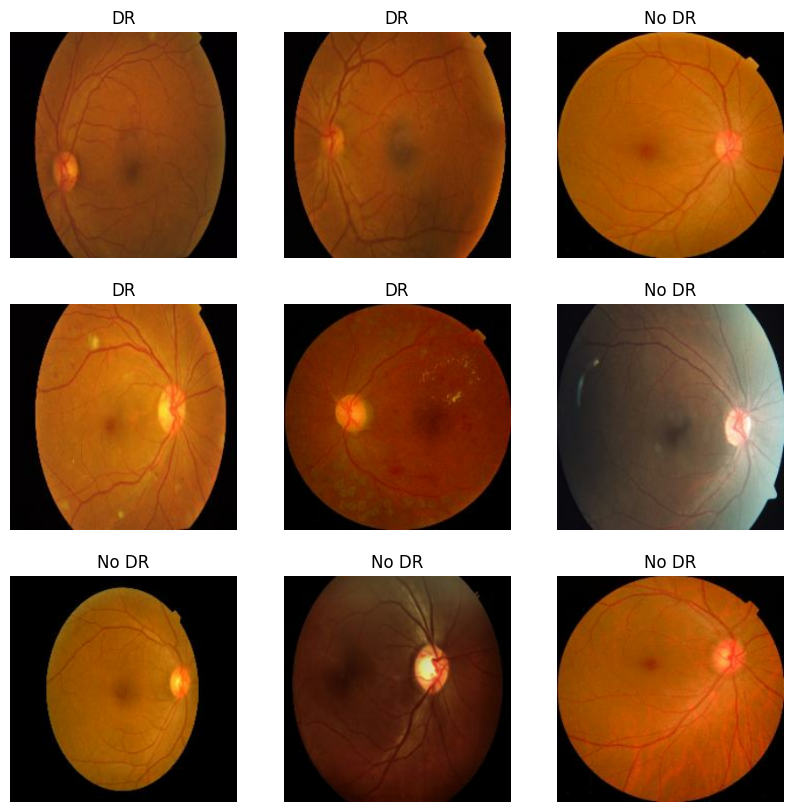

In [3]:
# Lets plot some of the images
# Plot inspiration comes from https://keras.io/examples/vision/image_classification_from_scratch/ 

label_dct = {
    0: 'DR', 
    1: "No DR"
}

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(label_dct[int(labels[i])])
        plt.axis("off")

In [4]:
# Let's also check if our training data is balanced 

def count_DR(image_dataset): 
    count = 0 
    for i, j in image_dataset: 
        for label in j: 
            if label== 0: 
                count += 1 
    return count 

print(f'The training dataset has {count_DR(train_data)} samples who have DR, and {2076 - count_DR(train_data)} which do not. The dataset is relatively balanced.')
print(f'The testing dataset has {count_DR(test_data)} samples who have DR, and {231 - count_DR(test_data)} which do not')
print(f'The validation dataset has {count_DR(valid_data)} samples who have DR, and {531 - count_DR(valid_data)} which do not')


The training dataset has 1050 samples who have DR, and 1026 which do not. The dataset is relatively balanced.
The testing dataset has 113 samples who have DR, and 118 which do not
The validation dataset has 245 samples who have DR, and 286 which do not


## 1. Unsupervised Learning 

There are a couple of things that we can do for unsupervised learning on this training set. The most obvious is an <b> autoencoder </b>, so that is what I will be doing for this dataset. I will also perform some K-Means clustering. 

In [5]:
# It took me a while to find out how to turn folders into X_train, X_test, etc 
# Credit to this website for giving me a template: https://stackoverflow.com/questions/60655280/how-to-split-an-image-dataset-in-x-train-y-train-x-test-y-test-by-tensorflow 

import glob
DR = glob.glob('images/train/DR/*.*')
NO_DR = glob.glob('images/train/NO_DR/*.*')
target_size = (224, 224)
data = []
labels = []

for i in DR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= target_size)
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in NO_DR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= target_size)
    image=np.array(image)
    data.append(image)
    labels.append(1)

X_train = np.array(data)
y_train = np.array(labels)

In [6]:
# Initializing Test 

DR = glob.glob('images/test/DR/*.*')
NO_DR = glob.glob('images/test/NO_DR/*.*')

data = []
labels = []

for i in DR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= target_size)
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in NO_DR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= target_size)
    image=np.array(image)
    data.append(image)
    labels.append(1)

X_test = np.array(data)
y_test = np.array(labels)

In [7]:
#Initializing Validation

DR = glob.glob('images/valid/DR/*.*')
NO_DR = glob.glob('images/valid/NO_DR/*.*')

data = []
labels = []

for i in DR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= target_size)
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in NO_DR:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= target_size)
    image=np.array(image)
    data.append(image)
    labels.append(1)

X_valid = np.array(data)
y_valid = np.array(labels)

#### K Means Clustering 

Let's do some image segmentation on one of the training images to see if it can recognize the areas that have diabetic retinopathy -- we'll get into the more complicated stuff later.  

(-0.5, 223.5, 223.5, -0.5)

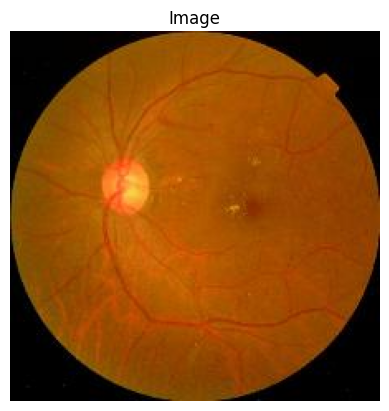

In [8]:
# Plot the first training image 

plt.imshow(X_train[3])
plt.title('Image')
plt.axis('off')

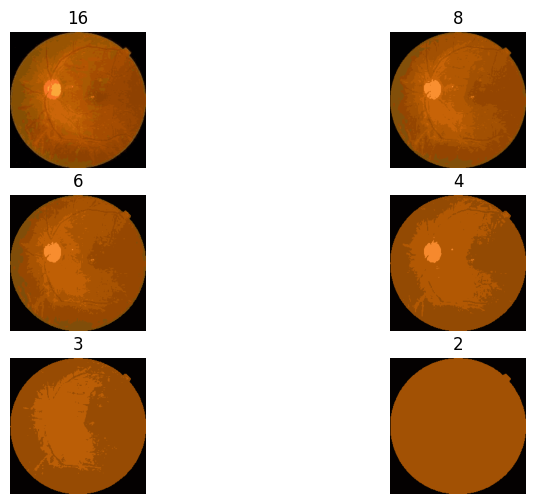

In [9]:
# Let's make our cluster
# Inspiration from class lecture 
 

from sklearn.cluster import KMeans

X = X_train[3].reshape(-1, 3)
fig, ax1 = plt.subplots(3,2, figsize=(9,6))
ax1 = ax1.flatten()

k_list = [16, 8, 6, 4, 3, 2]

for i, k in enumerate(k_list):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    
    #Colors
    segment_colors = np.array(kmeans.cluster_centers_) / 255
    
    #Get segmented image
    segmented_image = segment_colors[kmeans.labels_]
    segmented_image = segmented_image.reshape(image.shape)

    #Plot:
    ax1[i].imshow(segmented_image)
    ax1[i].set_title(k_list[i])
    ax1[i].set_axis_off()

Observations: 

The K-Means clustering algorithm is actually a decent evaluator of these fundus images. Up to k = 4, it is able to recognize the core features of diabetic retinopathy, which is the dots on the eyeball. Therefore, K means can serve as a good way to segment the image into parts up to k = 4 (at least for this particular image). 

However, the downsides of the K-means clustering algorithm is that at the end of the day, it still requires humans to look at the eye image and evaluate it, and the reduced image doesn't really help eye doctors. If I were an eye doctor, I would much rather look at a full resolution image than this one, because you can see more and it is much more specific. 

#### PCA Dimensionality Reduction

We can also do some dimensionality reduction on the training and testing dataset to see the most important features of the image dataset. 

In [10]:
# Necessary Import
from sklearn.decomposition import PCA 

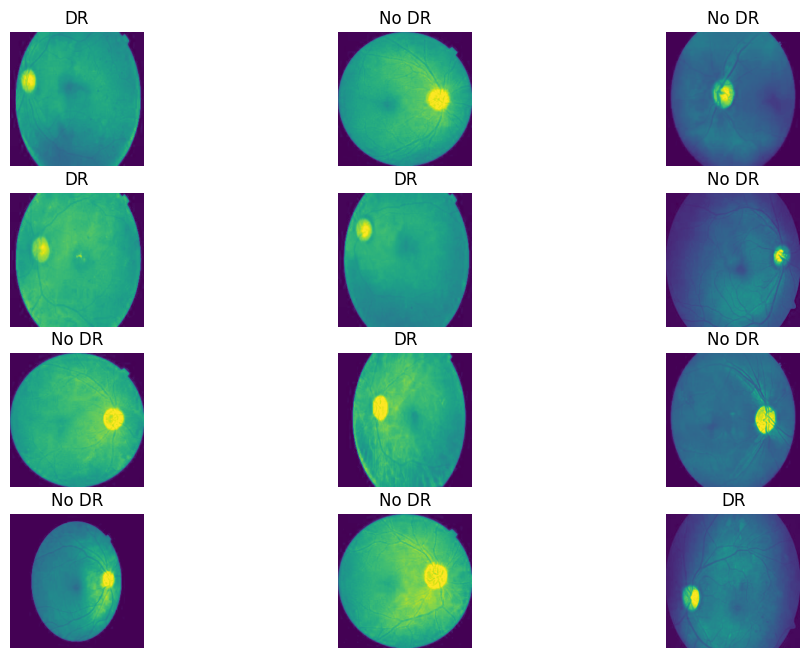

In [11]:
# First, let's plot the first 12 images of the training dataset to see what we are working with 
# Credit to the lecture on PCA analysis 

pca = PCA(n_components = 60)

# Have to make X_train rid of rgb column for it to work -- i just take the first dimension (not great practice but oh well)
X_train_pca = X_train[:, :, :, 0]

fig1, ax1 = plt.subplots(4, 3, figsize=(12,8))

ax1 = ax1.flatten()

#Let's save the random integers for a later plot
random_ints = []

#And plot:
for i in range(12):

    random_int = np.random.randint(low = 0, high = 2076)
    random_ints.append(random_int)
    im = ax1[i].imshow(X_train_pca[random_int])
    ax1[i].set_title(label_dct[y_train[random_int]])
    ax1[i].set_axis_off()

In [12]:
# Train the pca model 
X_train_pca= X_train_pca.reshape(-1, 224 * 224)
X_train_pca.shape

(2076, 50176)

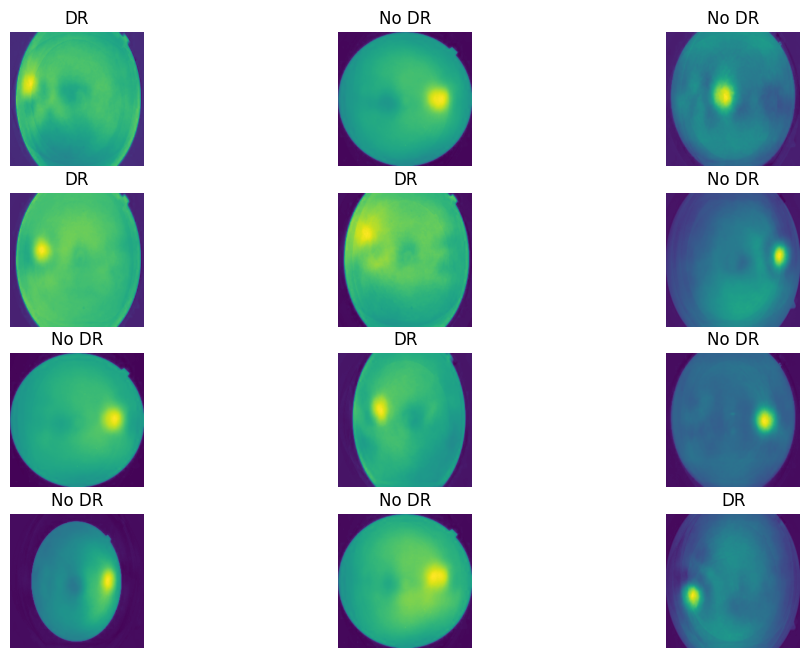

In [13]:
# Fitting the model -- Credit to PCA lecture
X_reduced = pca.fit_transform(X_train_pca)

# Plot also from lecture 

fig1, ax1 = plt.subplots(4, 3, figsize=(12,8))

ax1 = ax1.flatten()

for i in range(12):

    X_recovered = pca.inverse_transform(X_reduced[random_ints[i],:])
    
    im = ax1[i].imshow(X_recovered.reshape(224,224))
    ax1[i].set_axis_off()
    ax1[i].set_title(label_dct[y_train[random_ints[i]]])


Observations: 

Again, we can see that the PCA dimensionality reduction preserves a lot of the features of the original images. However, unlike the K-means algorithm, it doesn't preserve the parts of the image that really matter. For example, the dots that were preserved in the K-means images were removed in the PCA algorithm. Therefore, if we use a PCA algorithm with 60 components on this dataset, then it will remove one of the indicators of the disease, and therefore is ineffective. 

However, even beyond that, we still run into the same issue that we had with the K-means algorithm. Remember, these fundus images are looked at by doctors to determine if a patient has diabetic retinopathy. However, a doctor would not really like to see a more blurry image unless it really highlights the indicators of diabetic retinopathy, which according to cell.com is "Microaneurysms and hemorrhages that appear in the retina." We don't see any of the dots, and the intenral bleeding is less highlighted. 

For both K-means and PCA, if the images were higher quality, then maybe K-means and PCA can be used to gather the essential features, but in images that are 224 x 224, its just not reaonsable and loses a lot of the core features of the image. 

## 2. Supervised Learning

(First, the boring one)

In [14]:
# Logistic Regression 

# First have to reshape the X_train data 

X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_train_lr.shape

(2076, 150528)

In [15]:
# It's pretty simple, let's just fit and train the model!

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train_lr, y_train)

LogisticRegression(max_iter=10000)

In [16]:
# Analyze the performance of the model on the test set 

from sklearn.metrics import accuracy_score
X_test_lr = X_test.reshape(X_test.shape[0], -1)

predictions = lr.predict(X_test_lr)

print(f'Accuracy on the test set is {accuracy_score(y_test, predictions)}')

Accuracy on the test set is 0.935064935064935


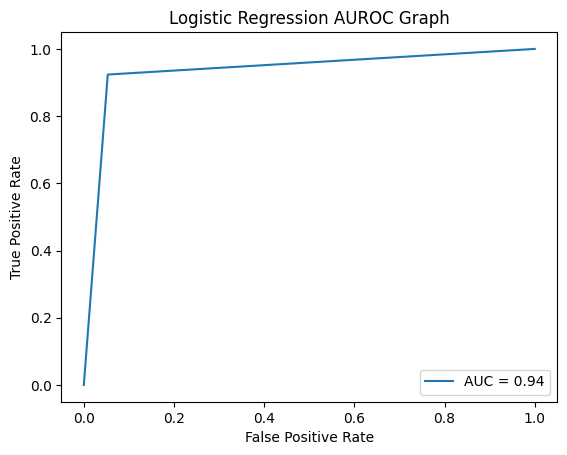

In [17]:
# Let's make an AUROC Graph 
# Credit to sklearn documentation on RocCurveDisplay

from sklearn.metrics import roc_curve, RocCurveDisplay, auc

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title('Logistic Regression AUROC Graph')
plt.show()


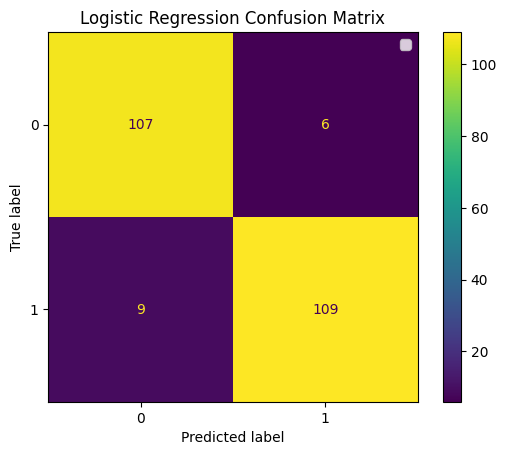

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
# Credit to sklearn documentation on confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr.classes_)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.legend(['0: DR', '1: No DR'])
plt.show()

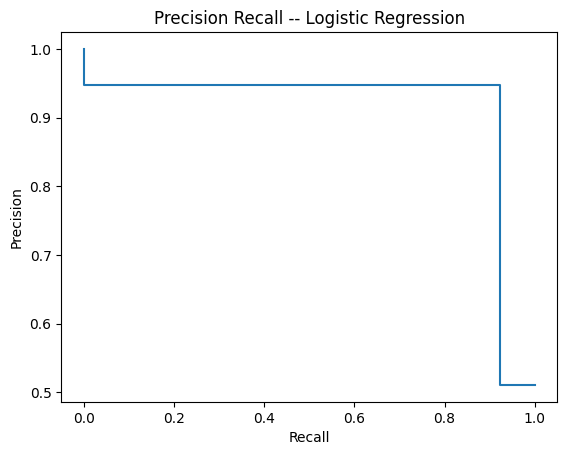

In [19]:
# Heck, let's do a precision-recall curve while we are at it 
# Credit: https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html#sklearn.metrics.PrecisionRecallDisplay.from_estimator

from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, predictions)

disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision Recall -- Logistic Regression')
plt.show()

#### So how did Logistic Regression perform? 

With an accuracy of 0.935 and an AUROC of 0.94, one could say that the model overall performed pretty well. And it certainly did -- since our expected value for our dataset is ~ 0.5 (given that the distribution of the training and test set was about even). 

However, in the context of this problem, these results cannot be acceptable. If a doctor only classified a patient with diabetic retinopathy correctly 93.5% of the time, 6.5% of the patients will continue suffering. This is a problem where we want an accuracy/AUROC of at <b>least</b> 99% of the time. Especially in medical problems and diagnoses, a high AUROC is really important, so the logistic model would either need to be fine tuned or abandoned for something like a CNN (spoiler alert: we will try that). Another option is taking only the options that the predicted probability was above a certain threshold, and have humans look at the rest. 

In conclusion, although the results look good relatively, this logistic model cannot be pushed to production since it's accuracy score/AUROC is simply too low given the problem's context. 








## <font color = 'pink'> CNN Time!

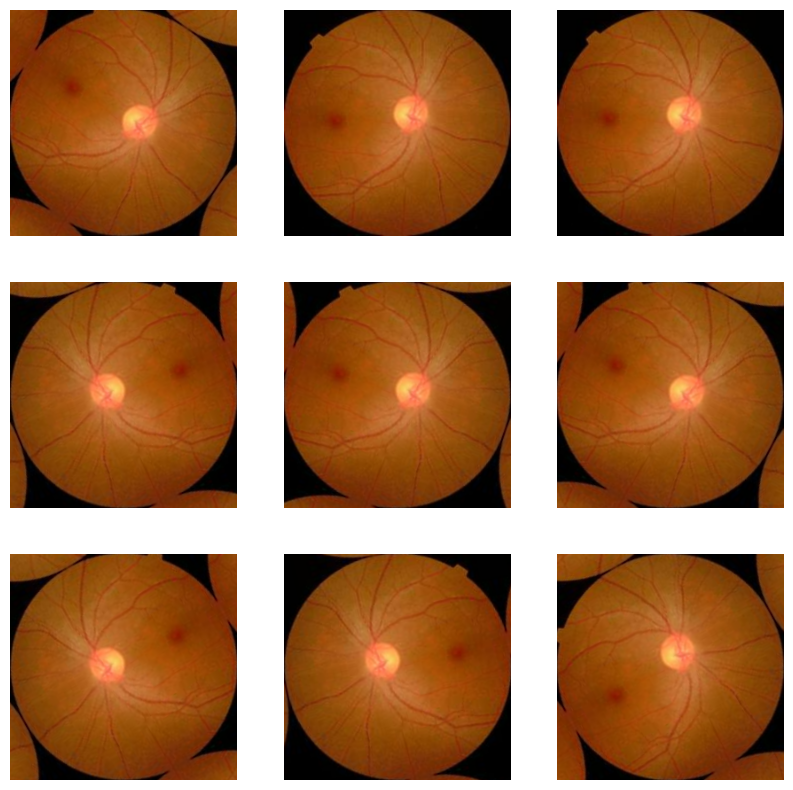

In [20]:
# Before we actually make a CNN, let's augment our image data to increase variability 

# We will rescale our image values 

# Credit to tensorflow.org/tutorials/images/data_augmentation for inspiration

aug_layers = [
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip('horizontal'), 
    tf.keras.layers.RandomRotation(0.1)
]

# Plotting and Augmenting our image: Inspiration from "Image Classification from Scratch" on keras website 
# Copied function and plot from said website
def data_augmentation(images): 
    for layer in aug_layers: 
        images = layer(images)
    return images 

plt.figure(figsize = (10, 10))
for images, _ in train_data.take(1): 
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]))
        plt.axis('off')

In [21]:
# Let's augment the train dataset 

train_ds = train_data.map(
    lambda x,y: (data_augmentation(x), y)
)

train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
# First, we can make an autoencoder and then use that for transfer learning into a more regular model

# I'm making my own model for this one, but later we will use smart people model  

'''
A combination of Conv2D, Batch Normalization, and Max Pooling Layers
The images are quite large (at least compared to what we did in class), 
    so I am making the model rather small 
'''

autoencoder = tf.keras.Sequential([
    tf.keras.layers.Conv2D(padding = 'same', filters = 32, input_shape = (256, 256, 3), kernel_size = (5, 5), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(strides = 2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'), 
    tf.keras.layers.BatchNormalization(), 
    tf.keras.layers.MaxPooling2D(strides = 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 256 * 256 * 3, activation = None),
    tf.keras.layers.Reshape([256, 256, 3])
])

autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 126, 126, 64)      256       
 chNormalization)                                                
                                                        

In [23]:
train_ds = train_ds.shuffle(buffer_size = 3)
autoencoder_x_train = np.concatenate([x for x, y in train_ds], axis = 0)

autoencoder.compile(
    loss = 'mse', 
    optimizer = 'adam'
)
history = autoencoder.fit(autoencoder_x_train, autoencoder_x_train, epochs = 3, batch_size = 128)

Epoch 1/3
17/17 [==============================] - 47s 3s/step - loss: 0.1123
Epoch 2/3
17/17 [==============================] - 40s 2s/step - loss: 0.0879
Epoch 3/3
17/17 [==============================] - 40s 2s/step - loss: 0.0215


1/1 [==============================] - 0s 115ms/step


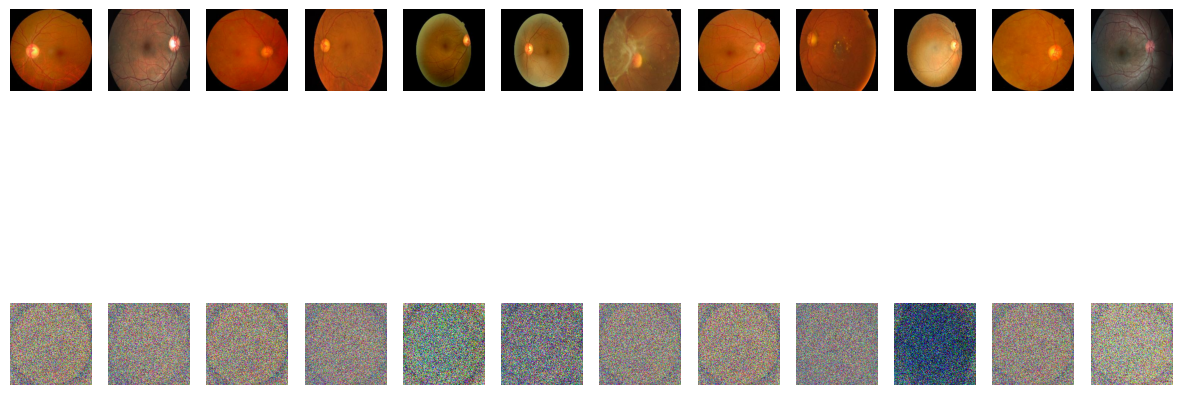

In [25]:
# Let's plot some of the images from the validation dataset 
# Plot from HW5 
autoencoder_x_valid = np.concatenate([x for x, y in valid_data], axis = 0)
autoencoder_y_valid = np.concatenate([y for x, y in valid_data], axis = 0)


fig1, ax1 = plt.subplots(2, 12, figsize = (15, 7))
ax1 = ax1.flatten()


for img, label in valid_data.take(1):
    imgs = autoencoder.predict(img[: 12])
    for i in range(12): 
        ax1[i].imshow(np.array(img[i]).astype('uint8'))
        #ax1[i].set_title(label[i], fontweight = 'bold')
        ax1[i].set_axis_off()
    for i in range(12, 24, 1): 
        ax1[i].imshow(np.array(imgs[i-12]).astype('uint8'))
        ax1[i].axis('off')


Okay, the autoencoder wasn't that useful, but I just wanted to try it. With high resolution images, decreasing the resolution of the images this much is not very good, but I just wanted to see if I could do it. 

However, I think that we will still have decent results in the transfer learning, but let's see. 

In [72]:
# Ok, let's do the transfer learning part now 

model_clone = tf.keras.models.clone_model(autoencoder)
model_clone.set_weights(autoencoder.get_weights())
model_transfer = tf.keras.Sequential(model_clone.layers[: -2])
model_transfer.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

#for layer in model_transfer.layers[: 4]: 
 #   layer.trainable = False

model_transfer.compile(
    loss ='BinaryCrossentropy',
    optimizer = 'adam', 
    metrics = [tf.keras.metrics.BinaryAccuracy(), tf.keras.metrics.AUC(from_logits = True), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history = model_transfer.fit(train_data, epochs = 3, validation_data = valid_data)

Epoch 1/3
65/65 [==============================] - 42s 640ms/step - loss: 1.1922 - binary_accuracy: 0.7702 - auc_2: 0.8592 - precision_1: 0.7226 - recall_1: 0.8684 - val_loss: 28.8281 - val_binary_accuracy: 0.6290 - val_auc_2: 0.6013 - val_precision_1: 0.6150 - val_recall_1: 0.8322
Epoch 2/3
65/65 [==============================] - 42s 640ms/step - loss: 0.3879 - binary_accuracy: 0.8709 - auc_2: 0.9597 - precision_1: 0.8330 - recall_1: 0.9240 - val_loss: 0.3365 - val_binary_accuracy: 0.8738 - val_auc_2: 0.9459 - val_precision_1: 0.8763 - val_recall_1: 0.8916
Epoch 3/3
65/65 [==============================] - 40s 617ms/step - loss: 0.2545 - binary_accuracy: 0.9051 - auc_2: 0.9632 - precision_1: 0.9433 - recall_1: 0.8596 - val_loss: 0.2009 - val_binary_accuracy: 0.8945 - val_auc_2: 0.9743 - val_precision_1: 0.9492 - val_recall_1: 0.8497


In [73]:

predictions = model_transfer.predict(test_data)

model_transfer.evaluate(test_data)

8/8 [==============================] - 1s 120ms/step - loss: 0.2251 - binary_accuracy: 0.8918 - auc_2: 0.9661 - precision_1: 0.9515 - recall_1: 0.8305


[0.22513514757156372,
 0.8917748928070068,
 0.9661391973495483,
 0.9514563083648682,
 0.8305084705352783]

Results 

So at the end of our neural network model, we have obtained a loss of 0.3, and an ~89% accuracy. However, our AURC is 0.966, Precision is 0.9515, and recall is 0.8305. 

This actually performed worse than the logistic regression model, but I think this is for a couple reasons. For one, I have a very simple model, with only 2 convolutional layers. Moreover, I only gave it 3 epochs to train; I think that the mdoel would have become much better with more epochs, but it takes so long for my computer to run it that I limited it to 3. 

Overall, I think that if I put a few more layers into my neural network, it would definitively outperform the logistic regression model. 

